<a href="https://colab.research.google.com/github/Gabriele90/Biohacker90/blob/main/ROC_AUC_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ROC-AUC Curve For Comprehensive Analysis Of Machine Learning Models**

In  machine learning when we build a model for classification tasks we do not build only a single model. We never rely on a single model since we have many different algorithms in machine learning that work differently on different datasets. We always have to build a model that best suits the respective data set so we try building different models and at last we choose the best performing model.
For this, we make use of Receiver Characteristics Curve – Area Under Curve that is plotted between True positive and False positive rates. In this article, we will learn more about the ROC-AUC curve and how we make use of it to compare different machine learning models to select the best performing model. For this experiment, we will make use of Pima-Indian Diabetes that can be downloaded from Kaggle.

**How to compare the performance of different models using the ROC-AUC curve? **

Let us now practically understand how we can plot this graph and compare different model performance. We will first build 4 different classification models using different machine learning algorithms and then will plot the ROC-AUC graph to check the best performing model. We will not quickly import the required libraries and the iris data set. Refer to the below code for the same. 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import roc_curve, auc
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now we will divide the dependent and independent features X and y respectively followed by splitting the data set into training and testing sets. Use the below code for the same

In [40]:
X = df.values[:,0:8]
Y = df.values[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)

We have divided the data into training and testing now we will build for different models for classifying the class i.e whether a patient is diabetic or not. Use the below code to build the respective models. 

In [41]:
clf1 = LogisticRegression()
clf2 = svm.SVC(kernel='linear', probability=True)
clf3 = RandomForestClassifier()
clf4 = DecisionTreeClassifier()

Since we have defined the four different classifiers now we will fit the training data over these and will predict probabilities for testing data. Use the below code for the same. 

In [42]:
probas1_ = clf1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = clf2.fit(X_train, y_train).predict_proba(X_test)
probas3_ = clf3.fit(X_train, y_train).predict_proba(X_test)
probas4_ = clf4.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Now we will compute the ROC curve and AUC score for all these classifiers. Use the below code for the same.

In [43]:
fp1, tp1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc_model2 = auc(fp2, tp2)
fp3, tp3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc_model3 = auc(fp3, tp3)
fp4, tp4, thresholds4 = roc_curve(y_test, probas4_[:, 1])
roc_auc_model4 = auc(fp4, tp4)
print("AUC for Logistic Regression Model : ",roc_auc_model1)
print("AUC for SVM Model:", roc_auc_model2)
print("AUC for Random Forest Model :" ,roc_auc_model3)
print("AUC for Decision Tree model :", roc_auc_model4)

AUC for Logistic Regression Model :  0.7828798185941044
AUC for SVM Model: 0.7766439909297052
AUC for Random Forest Model : 0.7825018896447469
AUC for Decision Tree model : 0.6715797430083145


Since we have got the AUC score now we will plot the roc curve to visualize the performance of all 4 models. Use the below code to do the same. 

In [44]:
import matplotlib.pyplot as plt

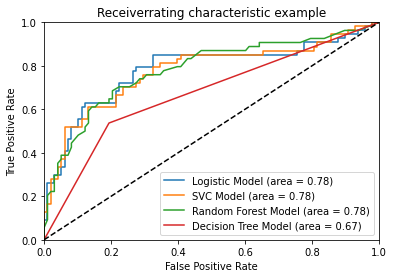

In [45]:
plt.clf()
plt.plot(fp1, tp1, label='Logistic Model (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='SVC Model (area = %0.2f)' % roc_auc_model2)
plt.plot(fp3, tp3, label='Random Forest Model (area = %0.2f)' % roc_auc_model3)
plt.plot(fp4, tp4, label='Decision Tree Model (area = %0.2f)' % roc_auc_model4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

We can see from the above graph the svc model captures the highest AUC and can be considered as the best performing model among all the four models. This way we can compute and compare different predictive models. We did this for binary classification, whereas if we want to do the same for multi-class classification models we can again do that. Consider we have three classes X, Y, and Z. So if we are plotting the curve for X class then it would be done as classification of X class against no other class i.e Y and Z. And similarly for other classes.